# Actividad - Visualización

* **Nombre:** Juan Carlos calderón García
* **Matrícula:** A01625696

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [14]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [3]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   
5      A Dance with Dragons (A Song of Ice and Fire)   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
5       George R. R. Martin          4.4    12643     11  2011      Fiction

El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

In [4]:
# Crea una tabla resumen con los estadísticas generales de las variables
# numéricas.
print(df.shape)

df_num = df[["User Rating","Reviews","Price","Year"]]
df_num.describe()

(550, 7)


User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000

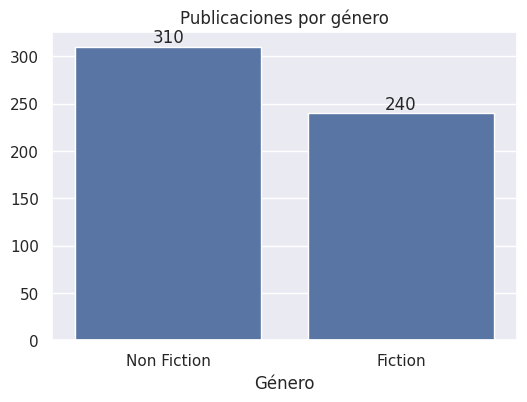

In [5]:
## ¿Cuál es el género con más publicaciones? Muéstralo en un gráfico.
fig = plt.figure(figsize=(6,4))

ax = sns.countplot(data=df, x="Genre")

ax.bar_label(ax.containers[0]);
ax.set_xlabel("Género");
ax.set_ylabel("");
ax.set_title("Publicaciones por género");

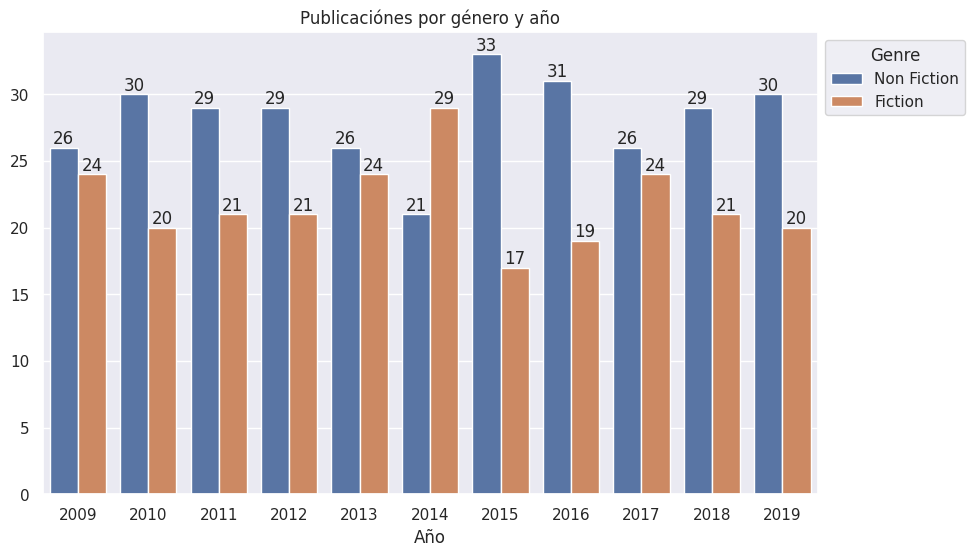

In [6]:
# ¿Cuántos libros del top 50 se publicaron por género en cada año? ¿Hay algún
# año donde hubo más libros de ficción en el top 50?. Muéstralo en un gráfico.
fig = plt.figure(figsize=(10,6))

ax = sns.countplot(data=df, x="Year", hue="Genre")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));

ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
ax.set_xlabel("Año");
ax.set_ylabel("");
ax.set_title("Publicaciónes por género y año");

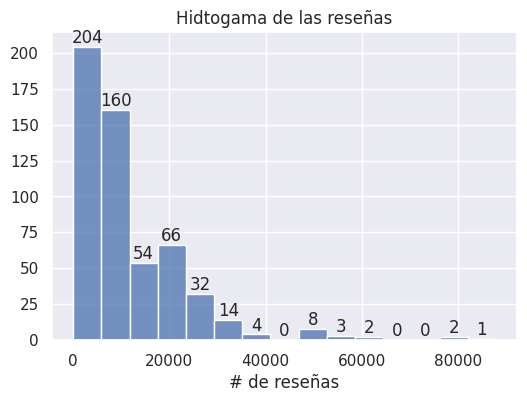

In [7]:
# ¿Cómo se distribuye la variable Review? Muéstra el histografa.
fig = plt.figure(figsize=(6,4))
ax = sns.histplot(data=df, x="Reviews", bins = 15)

ax.bar_label(ax.containers[0]);
ax.set_xlabel("# de reseñas");
ax.set_ylabel("");
ax.set_title("Hidtogama de las reseñas");

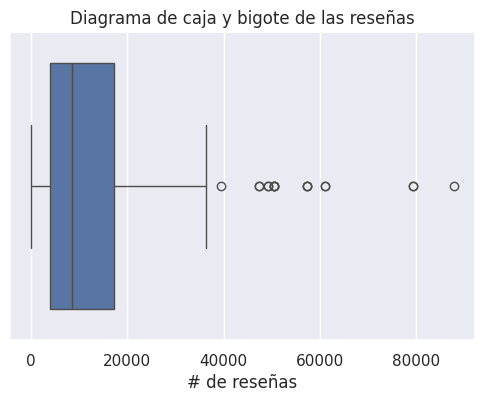

In [8]:
# Ahora muéstralo en un gráfico de caja y bigote.
fig = plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Reviews")

plt.xlabel("# de reseñas");
plt.title("Diagrama de caja y bigote de las reseñas");

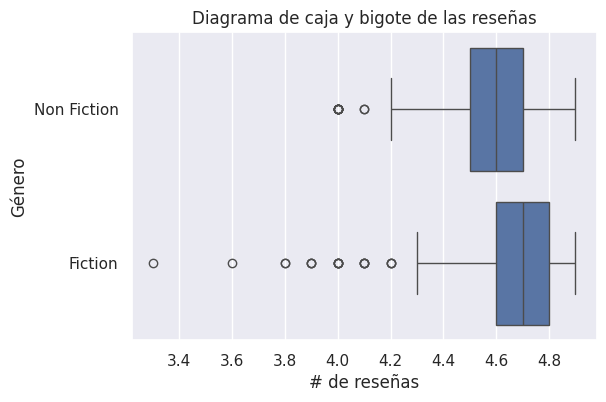

In [9]:
# ¿Cómo se compara la evaluación del libro por género? ¿Qué genero es mejor
# evaluado por los lectores? Muéstralo en un solo gráfico de caja y bigote.
fig = plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="User Rating", y="Genre")

plt.xlabel("# de reseñas");
plt.ylabel("Género");
plt.title("Diagrama de caja y bigote de las reseñas");

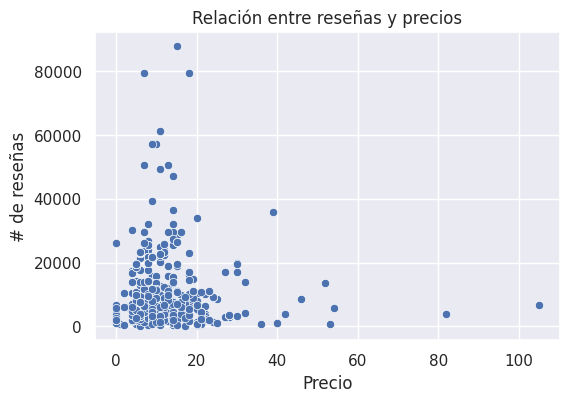

In [10]:
# ¿Cuál es la relación entre el número de reseñas y precios? Muéstralo en un
# gráfico de dispersión.
fig = plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Price", y="Reviews")

plt.xlabel("Precio");
plt.ylabel("# de reseñas");
plt.title("Relación entre reseñas y precios");

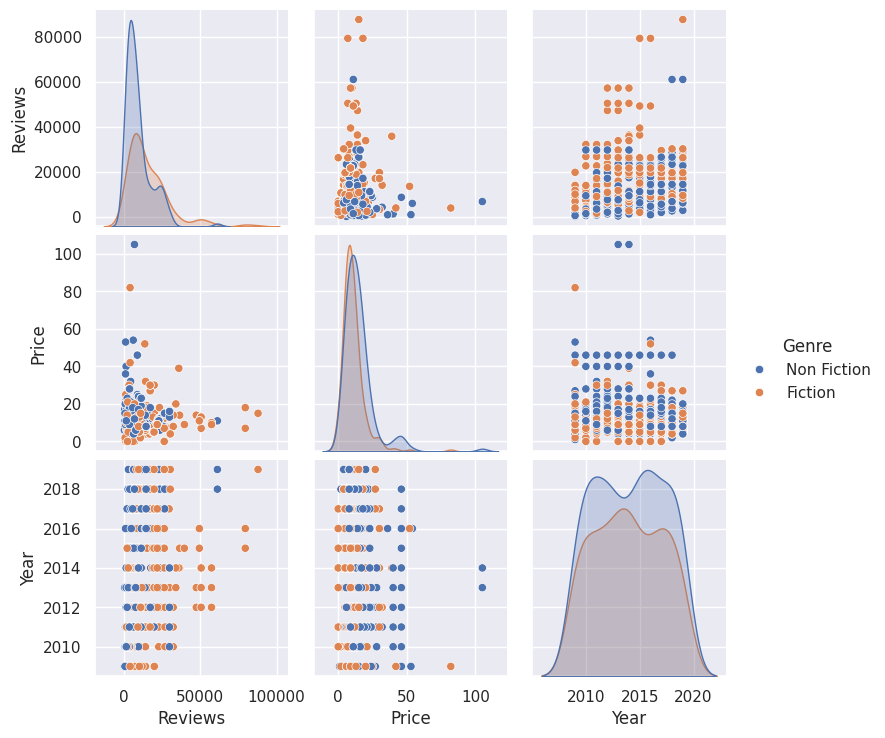

In [11]:
# De la pregunta anterior, ¿influye algo el año de publicación? ¿Cuál es la
# relación entre el número de reseñar, el precio y el año de publicación?
# IMPORTANTE: Selecciona una paleta de colores adeacuada.
dfpair = df[["Reviews", "Price", "Year", "Genre"]]

sns.pairplot(data=dfpair, hue="Genre");

<Axes: >

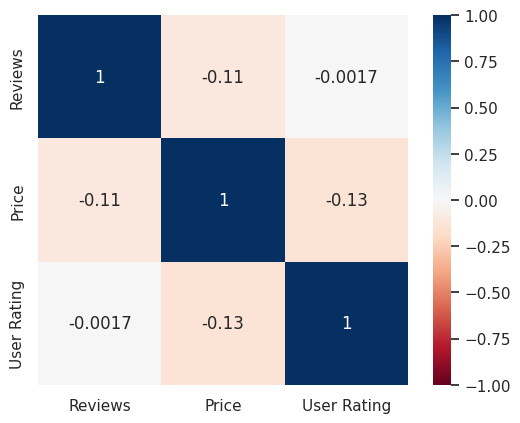

In [12]:
# ¿Cuál es la correlación entre las variables numéricas? Muéstralo en un
# gráfico. La variable año, a pesar de ser numérica, la vamos a considerar como
# cualitativa, así que la eliminaremos del análisis.
dfnum = df[["Reviews", "Price", "User Rating"]]
dfcorr = dfnum.corr()

sns.heatmap(data=dfcorr, vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square = True)

¿Cuáles variables tiene una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa? (Esta pregunta no es de código) Responde la pregunta en la siguiente celda de texto.

Todas las variebles tienen una relación negativa, pero todas son relaciones muy débiles que apenas superan 0.1.

<ipython-input-17-5cdbfbbc56a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnum["Name"] = le.fit_transform(dfnum["Name"]);
<ipython-input-17-5cdbfbbc56a4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnum['Author'] = le.fit_transform(dfnum['Author']);


<Axes: >

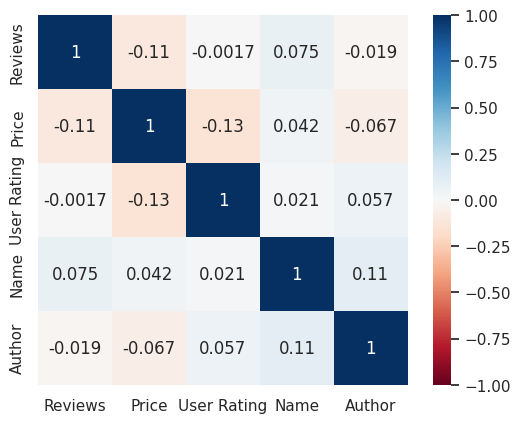

In [17]:
# Haz una gráfica donde podemos comparar la relación entre las tres variables
# numéricas (User Rating, Reviews y Price) y que, además, podamos ver el efecto
# del libro. La variable año, a pesar de ser numérica, la vamos a considerar como
# cualitativa, así que la eliminaremos del análisis.
dfnum = df[["Reviews", "Price", "User Rating", "Name", "Author"]]

dfnum["Name"] = le.fit_transform(dfnum["Name"]);
dfnum['Author'] = le.fit_transform(dfnum['Author']);

dfcorr = dfnum.corr()

sns.heatmap(data=dfcorr, vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square = True)